# **FAKE NEWS DETECTION**


## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [2]:
pip install opendatasets

##Loading the Dataset

In [3]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: paritapatel05
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


100%|██████████| 41.0M/41.0M [00:03<00:00, 11.6MB/s]


In [4]:
fake_df = pd.read_csv('/content/fake-and-real-news-dataset/Fake.csv')
true_df = pd.read_csv('/content/fake-and-real-news-dataset/True.csv')

In [5]:
display("fake news:",fake_df.head())
display("actual news:",true_df.head())

'fake news:'

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


'actual news:'

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Data Cleaning, EDA and Initial Visualisations

### EDA Fake_df

In [6]:
display(fake_df.describe(),fake_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


None

In [7]:
fake_df.isna().sum()

,0
title,0
text,0
subject,0
date,0


####Duplicates and Missing Values

In [8]:
# Drop duplicates
print('Duplicates:', fake_df.duplicated().sum())

unique_fake = fake_df.drop_duplicates()
unique_fake

Duplicates: 3


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [9]:
# Misisng values in text

display(unique_fake[unique_fake['text'] == ' '])
display(unique_fake[unique_fake.text== '  '])

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


,title,text,subject,date
12244,TRUMP SLAMS THE GLOBALISTS: “There is no globa...,,politics,"Dec 1, 2016"
12654,TRUMP SUPPORTERS In Virginia Beach Shout Down ...,,politics,"Oct 22, 2016"
16306,TRUMP SLAMS THE GLOBALISTS: “There is no globa...,,Government News,"Dec 1, 2016"
19756,TRUMP SUPPORTERS In Virginia Beach Shout Down ...,,left-news,"Oct 22, 2016"


In [10]:
# Misisng values in title

unique_fake[unique_fake['title'] == ' ']
unique_fake[unique_fake.title== '  ']

,title,text,subject,date


In [11]:
# Drop missing text data entries

fakes = unique_fake[(unique_fake['text'] != ' ') & (unique_fake['text'] != '  ')]
print('Final fake news dataframe after addressing duplicates and missing values: "fakes" -',fakes.shape)

Final fake news dataframe after addressing duplicates and missing values: "fakes" - (22848, 4)


#### Changing date format

In [12]:
date_formats = ['%B %d, %Y', '%b %d, %Y', '%d-%b-%y']

# Function to parse dates with different formats
def parse_dates(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT  # Return NaT if no format matches

# Apply the function to the 'date' column
fakes['date'] = fakes['date'].apply(parse_dates)

fakes.date.dtype

<ipython-input-12-ad5d9f5b36c5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakes['date'] = fakes['date'].apply(parse_dates)


dtype('<M8[ns]')

In [13]:
# Found error data entries
# Removing the entries

display(fakes[fakes.date.isna()])

fakes.dropna(inplace=True)
fakes

,title,text,subject,date
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,NaT
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,NaT
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,NaT
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT
18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,NaT
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT


<ipython-input-13-f83e180f143b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakes.dropna(inplace=True)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14


#### Adding label

In [14]:
fakes['label'] = 1
fakes

<ipython-input-14-0e3a10f60d94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fakes['label'] = 1


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16,1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16,1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15,1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14,1


### EDA True_df

In [15]:
display(true_df.describe(),true_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


None

####Duplicates and Missing Values

In [16]:
# Drop duplicates
print('Duplicates:', true_df.duplicated().sum())

unique_true = true_df.drop_duplicates()
unique_true

Duplicates: 206


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [17]:
# Misisng values in text

display(unique_true[unique_true['text'] == ' '])
display(unique_true[unique_true.text== '  '])

,title,text,subject,date
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016"


,title,text,subject,date


In [18]:
# Misisng values in title

display(unique_true[unique_true['title'] == ' '])
display(unique_true[unique_true.title== '  '])

,title,text,subject,date


,title,text,subject,date


In [19]:
# Drop missing text data entries

true = unique_true[(unique_true['text'] != ' ') & (unique_true['text'] != '  ')]
print('Final actual news dataframe after addressing duplicates and missing values: "true" -',true.shape)

Final actual news dataframe after addressing duplicates and missing values: "true" - (21210, 4)


#### Changing date format

In [20]:
true['date'] = pd.to_datetime(true['date'])
true['date'].dtype

<ipython-input-20-bf01a4cd015b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['date'] = pd.to_datetime(true['date'])


dtype('<M8[ns]')

In [21]:
true['date'].isna().sum()

0

#### Adding label

In [22]:
true['label'] = 0
true

<ipython-input-22-f3899c8e3c61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['label'] = 0


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,0


### Comparing the datasets - Visualisations

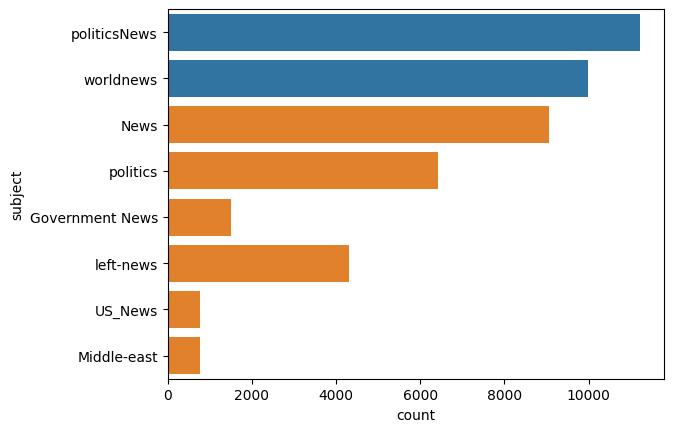

In [23]:
sns.countplot(true.subject)
sns.countplot(fakes.subject);

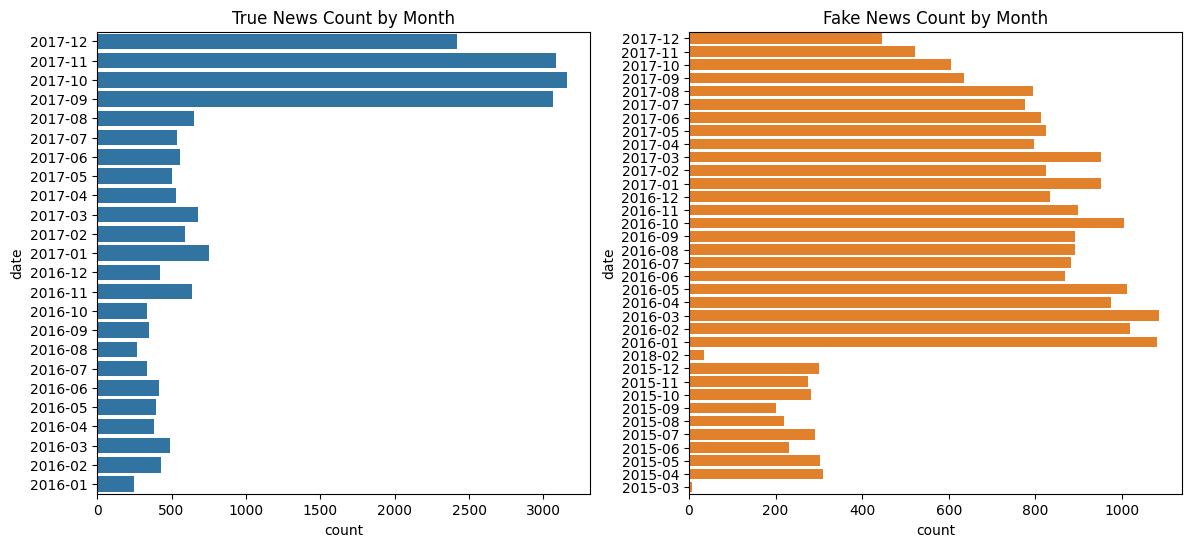

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(true['date'].dt.to_period('M'),ax=ax1)
ax1.set_title('True News Count by Month')
sns.countplot(fakes['date'].dt.to_period('M'),ax=ax2,color='#ff7f0e')
ax2.set_title('Fake News Count by Month')
plt.show();

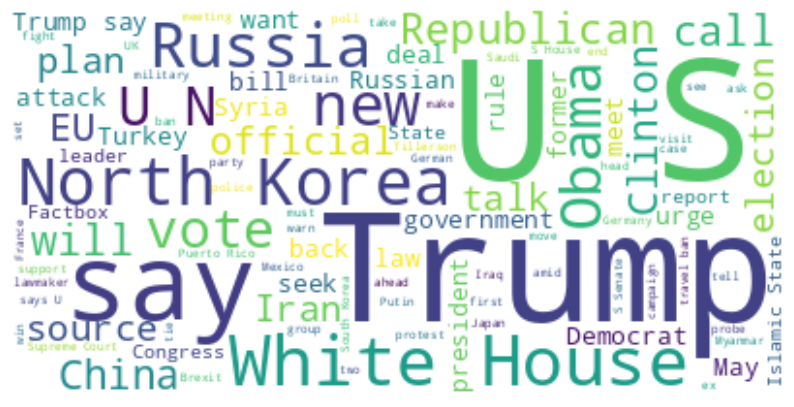

In [25]:
# Word Cloud - True title

from wordcloud import WordCloud

text_data = ' '.join(true['title'])

# word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='mako').generate(text_data)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

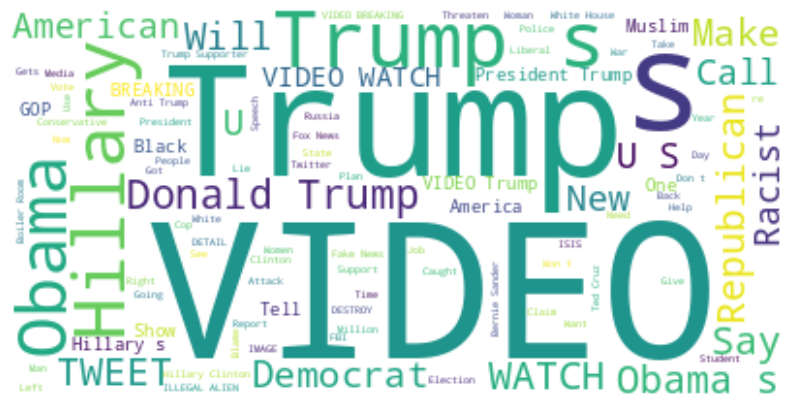

In [26]:
# Word Cloud - Fakes title

from wordcloud import WordCloud

text_data = ' '.join(fakes['title'])

# word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='mako').generate(text_data)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

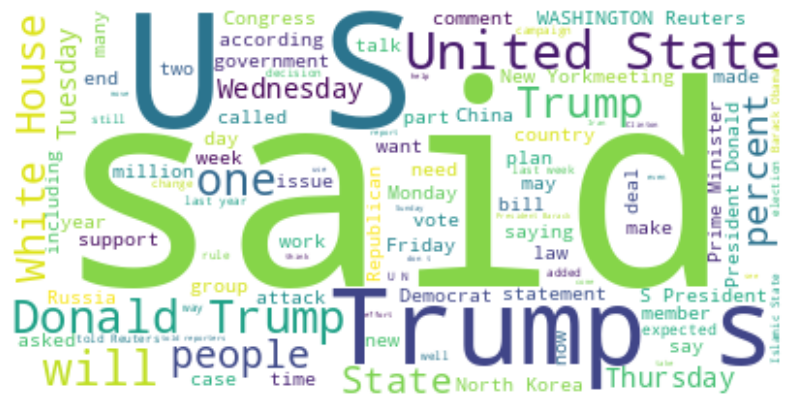

In [27]:
# Word Cloud - True text

from wordcloud import WordCloud

text_data = ' '.join(true['text'])

# word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='mako').generate(text_data)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

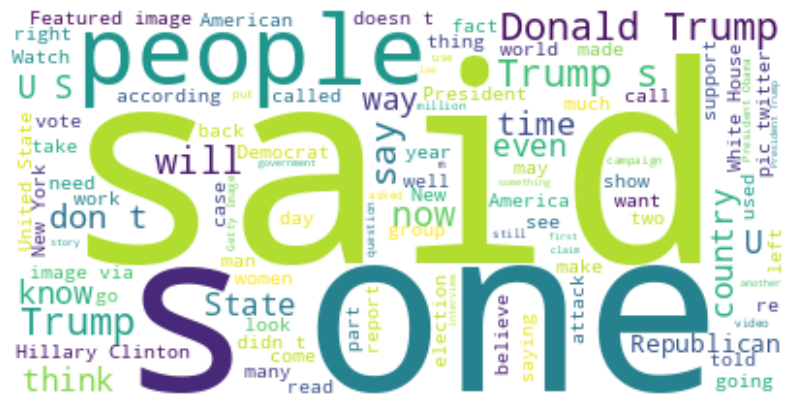

In [28]:
# Word Cloud - Fakes text

from wordcloud import WordCloud

text_data = ' '.join(fakes['text'])

# word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='mako').generate(text_data)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Combining the datasets

In [29]:
df = pd.concat([true,fakes])
display(df.head())
print('   ')
print("Label 0 corresponds to True News")
print("Label 1 corresponds to Fake News")

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,0


   
Label 0 corresponds to True News
Label 1 corresponds to Fake News


In [30]:
# shuffling the data

shuffled_df= df.sample(n=len(df),replace=False).reset_index(drop=True)
shuffled_df

,title,text,subject,date,label
0,What A Joke! Hillary Clinton Goes Missing Duri...,Hillary Clinton has a habit of going missing d...,politics,2015-12-20,1
1,Trump Campaign Accidentally CONFIRMS That Tru...,"True to form, Trump and his campaign are royal...",News,2016-10-01,1
2,"Ivory Coast to retire 1,000 soldiers to slim d...",ABIDJAN (Reuters) - Ivory Coast will cut its a...,worldnews,2017-12-06,0
3,White Las Vegas Teen Caught On Camera Calling...,A Las Vegas high school student was caught on ...,News,2017-05-10,1
4,Ben Carson Just Totally Lost His Sh*t On MSNB...,When Ben Carson was asked about the multiple w...,News,2016-10-14,1
...,...,...,...,...,...
44043,Powerful Mexico former union boss granted hous...,MEXICO CITY (Reuters) - The powerful former le...,worldnews,2017-12-15,0
44044,MASS NYE SEXUAL ASSAULTS IN EUROPE EXPLAINED: ...,This is possibly the most disturbing video we ...,Government News,2016-01-12,1
44045,Senate set to begin debate on Puerto Rico debt...,WASHINGTON/NEW YORK (Reuters) - After months o...,politicsNews,2016-06-27,0
44046,U.S. net neutrality advocates blast Pai effort...,WASHINGTON (Reuters) - Advocates of landmark n...,politicsNews,2017-04-07,0


In [31]:
shuffled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44048 entries, 0 to 44047
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44048 non-null  object        
 1   text     44048 non-null  object        
 2   subject  44048 non-null  object        
 3   date     44048 non-null  datetime64[ns]
 4   label    44048 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


## Data Processing and Cleaning for Machine Learning

We have observed that the actual news dataset has sources mentioned before the main text of the article, and the fake dataset have largely mentioned urls in their text. For the machine to not just learn on these feature we have to remove those locations and sources.

In [32]:
# @title Combined Dataset cleaning and tokenisation

# Removing sources and urls
# Removing "video" if it is the first word (common occurance in fakes dataset)
# lowercasing the letters and only keeping alphnumeric characters
# Removing stop words
# Tokenisation


import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# Convert title and text to lowercase
title_lower = shuffled_df['title'].str.lower()
text_lower = shuffled_df['text'].str.lower()

# Function to remove sources (words before the first hyphen)
def remove_sources(text):
    if '-' in text:
        parts = text.split('-', 1)  # Split only at the first hyphen
        words_before_hyphen = parts[0].strip().split()
        if len(words_before_hyphen) <= 3:
            text = parts[1].strip()  # Keep only the part after the hyphen
    return text


# Function to clean the text by removing URLs, non-alphanumeric characters, and stop words
def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://[^\s]+', '', text)
    # Keep only English letters, numbers, and spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Reassemble the cleaned text
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

# Apply the remove sources function to title and text
shuffled_df['processed_title'] = title_lower.apply(remove_sources)
shuffled_df['processed_text'] = text_lower.apply(remove_sources)


# Apply the cleaning function to the already processed title and text
shuffled_df['processed_title'] = shuffled_df['processed_title'].apply(clean_text)
shuffled_df['processed_text'] = shuffled_df['processed_text'].apply(clean_text)

# Display the processed data
shuffled_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,text,subject,date,label,processed_title,processed_text
0,What A Joke! Hillary Clinton Goes Missing Duri...,Hillary Clinton has a habit of going missing d...,politics,2015-12-20,1,joke hillary clinton goes missing dem debate s...,hillary clinton habit going missing debates la...
1,Trump Campaign Accidentally CONFIRMS That Tru...,"True to form, Trump and his campaign are royal...",News,2016-10-01,1,trump campaign accidentally confirms trump ill...,true form trump campaign royally pissed newswe...
2,"Ivory Coast to retire 1,000 soldiers to slim d...",ABIDJAN (Reuters) - Ivory Coast will cut its a...,worldnews,2017-12-06,0,ivory coast retire 1000 soldiers slim military,ivory coast cut armed forces 1000 troops end y...
3,White Las Vegas Teen Caught On Camera Calling...,A Las Vegas high school student was caught on ...,News,2017-05-10,1,white las vegas teen caught camera calling bla...,las vegas high school student caught camera ca...
4,Ben Carson Just Totally Lost His Sh*t On MSNB...,When Ben Carson was asked about the multiple w...,News,2016-10-14,1,ben carson totally lost sht msnbc asked trump ...,ben carson asked multiple women accusing donal...
...,...,...,...,...,...,...,...
44043,Powerful Mexico former union boss granted hous...,MEXICO CITY (Reuters) - The powerful former le...,worldnews,2017-12-15,0,powerful mexico former union boss granted hous...,powerful former leader mexico largest teacher ...
44044,MASS NYE SEXUAL ASSAULTS IN EUROPE EXPLAINED: ...,This is possibly the most disturbing video we ...,Government News,2016-01-12,1,mass nye sexual assaults europe explained vide...,possibly disturbing video ever posted website ...
44045,Senate set to begin debate on Puerto Rico debt...,WASHINGTON/NEW YORK (Reuters) - After months o...,politicsNews,2016-06-27,0,senate set begin debate puerto rico debt relie...,months waiting us congress act puerto ricos ec...
44046,U.S. net neutrality advocates blast Pai effort...,WASHINGTON (Reuters) - Advocates of landmark n...,politicsNews,2017-04-07,0,us net neutrality advocates blast pai effort r...,advocates landmark net neutrality rules friday...


In [33]:
# @title Removing missing rows from the Cleaned final dataset
# Removing empty rows after data cleaning (few text with only html links removed)

display(shuffled_df[(shuffled_df.processed_text=='') | (shuffled_df.processed_title=='')])

shuffled_df = shuffled_df[(shuffled_df['processed_text'] != '') & (shuffled_df['processed_title'] != '')]
shuffled_df

,title,text,subject,date,label,processed_title,processed_text
367,PRESIDENT TRUMP Calls Out Media For Ignoring P...,https://www.youtube.com/watch?v=aHkNzBRqPCE,politics,2017-01-26,1,president trump calls media ignoring prolife m...,
905,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horr...,https://twitter.com/Rosie/status/8009393386158...,politics,2016-11-23,1,wow leftist bully rosie odonnell pushes horrib...,
2930,Judge Jeanine Gets to The Bottom of “Towergate...,https://www.youtube.com/watch?v=n9tfNMQpYWU,politics,2017-03-05,1,judge jeanine gets bottom towergate video,
3741,WATCH Huge Crowd Of Muslims Admit That ALL Mus...,https://www.youtube.com/watch?v=8Mehk5eWcZA,politics,2017-02-08,1,watch huge crowd muslims admit muslims conside...,
5127,JUDGE JEANINE PIRRO’S TRUTH BOMB On Fired US A...,https://www.youtube.com/watch?v=yRXmFmgoPTk,Government News,2017-03-12,1,judge jeanine pirros truth bomb fired us attor...,
...,...,...,...,...,...,...,...
42840,WOW! CHUCK TODD Goes After Nasty Chuck Schumer...,https://www.youtube.com/watch?v=EOr9fwoc_mo,politics,2017-01-22,1,wow chuck todd goes nasty chuck schumer opposi...,
42880,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horr...,https://twitter.com/Rosie/status/8009393386158...,left-news,2016-11-23,1,wow leftist bully rosie odonnell pushes horrib...,
43624,HEATED! TUCKER CARLSON Totally Shuts Down Radi...,https://www.youtube.com/watch?v=RRPSCqkAJgk,politics,2017-01-17,1,heated tucker carlson totally shuts radical li...,
43982,TRUMP CABINET MEMBER MICK MULVANEY ON DC: “Thi...,https://www.youtube.com/watch?time_continue=2&...,politics,2017-03-26,1,trump cabinet member mick mulvaney dc place mu...,


,title,text,subject,date,label,processed_title,processed_text
0,What A Joke! Hillary Clinton Goes Missing Duri...,Hillary Clinton has a habit of going missing d...,politics,2015-12-20,1,joke hillary clinton goes missing dem debate s...,hillary clinton habit going missing debates la...
1,Trump Campaign Accidentally CONFIRMS That Tru...,"True to form, Trump and his campaign are royal...",News,2016-10-01,1,trump campaign accidentally confirms trump ill...,true form trump campaign royally pissed newswe...
2,"Ivory Coast to retire 1,000 soldiers to slim d...",ABIDJAN (Reuters) - Ivory Coast will cut its a...,worldnews,2017-12-06,0,ivory coast retire 1000 soldiers slim military,ivory coast cut armed forces 1000 troops end y...
3,White Las Vegas Teen Caught On Camera Calling...,A Las Vegas high school student was caught on ...,News,2017-05-10,1,white las vegas teen caught camera calling bla...,las vegas high school student caught camera ca...
4,Ben Carson Just Totally Lost His Sh*t On MSNB...,When Ben Carson was asked about the multiple w...,News,2016-10-14,1,ben carson totally lost sht msnbc asked trump ...,ben carson asked multiple women accusing donal...
...,...,...,...,...,...,...,...
44043,Powerful Mexico former union boss granted hous...,MEXICO CITY (Reuters) - The powerful former le...,worldnews,2017-12-15,0,powerful mexico former union boss granted hous...,powerful former leader mexico largest teacher ...
44044,MASS NYE SEXUAL ASSAULTS IN EUROPE EXPLAINED: ...,This is possibly the most disturbing video we ...,Government News,2016-01-12,1,mass nye sexual assaults europe explained vide...,possibly disturbing video ever posted website ...
44045,Senate set to begin debate on Puerto Rico debt...,WASHINGTON/NEW YORK (Reuters) - After months o...,politicsNews,2016-06-27,0,senate set begin debate puerto rico debt relie...,months waiting us congress act puerto ricos ec...
44046,U.S. net neutrality advocates blast Pai effort...,WASHINGTON (Reuters) - Advocates of landmark n...,politicsNews,2017-04-07,0,us net neutrality advocates blast pai effort r...,advocates landmark net neutrality rules friday...


In [34]:
# @title Removing text starting with 'VIDEO'
# Function to remove 'VIDEO' if its the first word

def remove_video(text):
    words = text.split()
    if words[0] == 'video':
        words[0] = words[0].strip()
        text = ' '.join(words)
    return text


# Apply the remove video function to title and text
shuffled_df['processed_title'] = shuffled_df['processed_title'].apply(remove_video)
shuffled_df['processed_text'] = shuffled_df['processed_text'].apply(remove_video)

# Display the processed data
shuffled_df

<ipython-input-34-f11c875273a8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df['processed_title'] = shuffled_df['processed_title'].apply(remove_video)
<ipython-input-34-f11c875273a8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df['processed_text'] = shuffled_df['processed_text'].apply(remove_video)


,title,text,subject,date,label,processed_title,processed_text
0,What A Joke! Hillary Clinton Goes Missing Duri...,Hillary Clinton has a habit of going missing d...,politics,2015-12-20,1,joke hillary clinton goes missing dem debate s...,hillary clinton habit going missing debates la...
1,Trump Campaign Accidentally CONFIRMS That Tru...,"True to form, Trump and his campaign are royal...",News,2016-10-01,1,trump campaign accidentally confirms trump ill...,true form trump campaign royally pissed newswe...
2,"Ivory Coast to retire 1,000 soldiers to slim d...",ABIDJAN (Reuters) - Ivory Coast will cut its a...,worldnews,2017-12-06,0,ivory coast retire 1000 soldiers slim military,ivory coast cut armed forces 1000 troops end y...
3,White Las Vegas Teen Caught On Camera Calling...,A Las Vegas high school student was caught on ...,News,2017-05-10,1,white las vegas teen caught camera calling bla...,las vegas high school student caught camera ca...
4,Ben Carson Just Totally Lost His Sh*t On MSNB...,When Ben Carson was asked about the multiple w...,News,2016-10-14,1,ben carson totally lost sht msnbc asked trump ...,ben carson asked multiple women accusing donal...
...,...,...,...,...,...,...,...
44043,Powerful Mexico former union boss granted hous...,MEXICO CITY (Reuters) - The powerful former le...,worldnews,2017-12-15,0,powerful mexico former union boss granted hous...,powerful former leader mexico largest teacher ...
44044,MASS NYE SEXUAL ASSAULTS IN EUROPE EXPLAINED: ...,This is possibly the most disturbing video we ...,Government News,2016-01-12,1,mass nye sexual assaults europe explained vide...,possibly disturbing video ever posted website ...
44045,Senate set to begin debate on Puerto Rico debt...,WASHINGTON/NEW YORK (Reuters) - After months o...,politicsNews,2016-06-27,0,senate set begin debate puerto rico debt relie...,months waiting us congress act puerto ricos ec...
44046,U.S. net neutrality advocates blast Pai effort...,WASHINGTON (Reuters) - Advocates of landmark n...,politicsNews,2017-04-07,0,us net neutrality advocates blast pai effort r...,advocates landmark net neutrality rules friday...


<ipython-input-127-d108ff638d77>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  set2 = cm.get_cmap('Set2')


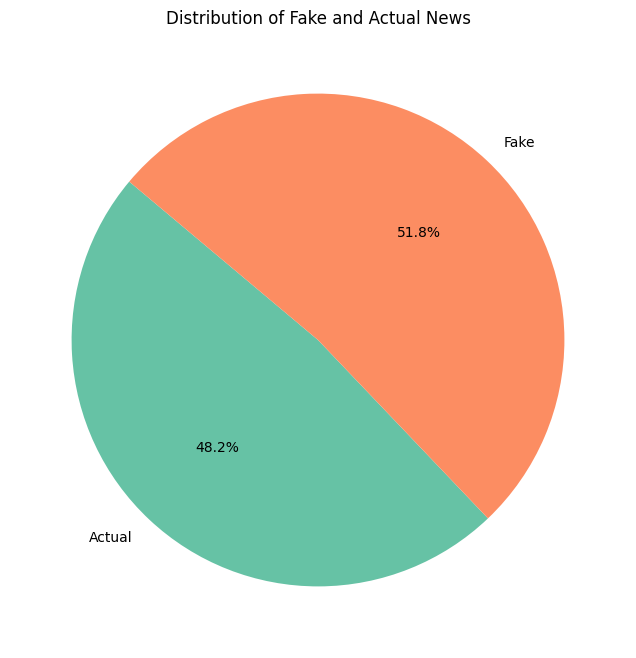

In [127]:
# @title Fake and Real News Distribution

import matplotlib.cm as cm

label_counts = shuffled_df.groupby('label').size()

set2 = cm.get_cmap('Set2')
colors = [set2(0), set2(1)]

plt.figure(figsize=(8, 8))
label_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140,labels=['Actual','Fake'],colors=colors)

plt.title('Distribution of Fake and Actual News')
plt.show()

# Sentiment Analysis

In [36]:
import nltk

# Download the vader_lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Sentiment analysis of processed_text
text_sentiment = []

for i in range(len(shuffled_df)):
  sentence_text = shuffled_df['processed_text'].iloc[i]
  sentiment_scores = sia.polarity_scores(sentence_text)
  if sentiment_scores['compound'] >= 0.05:
    sentiment = "Positive"
  elif sentiment_scores['compound'] <= -0.05:
      sentiment = "Negative"
  else:
      sentiment = "Neutral"
  text_sentiment.append(sentiment)


# Sentiment analysis of processed_text
title_sentiment = []

for i in range(len(shuffled_df)):
  sentence_title = shuffled_df['processed_title'].iloc[i]
  sentiment_scores = sia.polarity_scores(sentence_title)
  if sentiment_scores['compound'] >= 0.05:
    sentiment = "Positive"
  elif sentiment_scores['compound'] <= -0.05:
      sentiment = "Negative"
  else:
      sentiment = "Neutral"
  title_sentiment.append(sentiment)


shuffled_df['title_sentiment'] = title_sentiment
shuffled_df['text_sentiment'] = text_sentiment
shuffled_df

<ipython-input-37-84f766098727>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df['title_sentiment'] = title_sentiment
<ipython-input-37-84f766098727>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df['text_sentiment'] = text_sentiment


,title,text,subject,date,label,processed_title,processed_text,title_sentiment,text_sentiment
0,What A Joke! Hillary Clinton Goes Missing Duri...,Hillary Clinton has a habit of going missing d...,politics,2015-12-20,1,joke hillary clinton goes missing dem debate s...,hillary clinton habit going missing debates la...,Negative,Positive
1,Trump Campaign Accidentally CONFIRMS That Tru...,"True to form, Trump and his campaign are royal...",News,2016-10-01,1,trump campaign accidentally confirms trump ill...,true form trump campaign royally pissed newswe...,Negative,Negative
2,"Ivory Coast to retire 1,000 soldiers to slim d...",ABIDJAN (Reuters) - Ivory Coast will cut its a...,worldnews,2017-12-06,0,ivory coast retire 1000 soldiers slim military,ivory coast cut armed forces 1000 troops end y...,Neutral,Negative
3,White Las Vegas Teen Caught On Camera Calling...,A Las Vegas high school student was caught on ...,News,2017-05-10,1,white las vegas teen caught camera calling bla...,las vegas high school student caught camera ca...,Neutral,Positive
4,Ben Carson Just Totally Lost His Sh*t On MSNB...,When Ben Carson was asked about the multiple w...,News,2016-10-14,1,ben carson totally lost sht msnbc asked trump ...,ben carson asked multiple women accusing donal...,Negative,Negative
...,...,...,...,...,...,...,...,...,...
44043,Powerful Mexico former union boss granted hous...,MEXICO CITY (Reuters) - The powerful former le...,worldnews,2017-12-15,0,powerful mexico former union boss granted hous...,powerful former leader mexico largest teacher ...,Positive,Negative
44044,MASS NYE SEXUAL ASSAULTS IN EUROPE EXPLAINED: ...,This is possibly the most disturbing video we ...,Government News,2016-01-12,1,mass nye sexual assaults europe explained vide...,possibly disturbing video ever posted website ...,Negative,Negative
44045,Senate set to begin debate on Puerto Rico debt...,WASHINGTON/NEW YORK (Reuters) - After months o...,politicsNews,2016-06-27,0,senate set begin debate puerto rico debt relie...,months waiting us congress act puerto ricos ec...,Positive,Negative
44046,U.S. net neutrality advocates blast Pai effort...,WASHINGTON (Reuters) - Advocates of landmark n...,politicsNews,2017-04-07,0,us net neutrality advocates blast pai effort r...,advocates landmark net neutrality rules friday...,Neutral,Positive


In [39]:
# Analysis of the Text Sentiments

print('Summary of Text Sentiment for the Actual News:')
display(shuffled_df[shuffled_df.label == 0].text_sentiment.value_counts())
print('   ')
print('Summary of Text Sentiment for the Fake News:')
shuffled_df[shuffled_df.label == 1].text_sentiment.value_counts()

Summary of Text Sentiment for the Actual News:


,count
text_sentiment,
Positive,11507
Negative,9246
Neutral,457


   
Summary of Text Sentiment for the Fake News:


,count
text_sentiment,
Negative,11803
Positive,10561
Neutral,406


In [45]:
# Analysis of the Title Sentiments

print('Summary of Title Sentiment for the Actual News:')
display(shuffled_df[shuffled_df.label == 0].title_sentiment.value_counts())
print('   ')
print('Summary of Title Sentiment for the Fake News:')
shuffled_df[shuffled_df.label == 1].title_sentiment.value_counts()

Summary of Title Sentiment for the Actual News:


,count
title_sentiment,
Neutral,7928
Negative,7771
Positive,5511


   
Summary of Title Sentiment for the Fake News:


,count
title_sentiment,
Negative,12194
Positive,6032
Neutral,4544


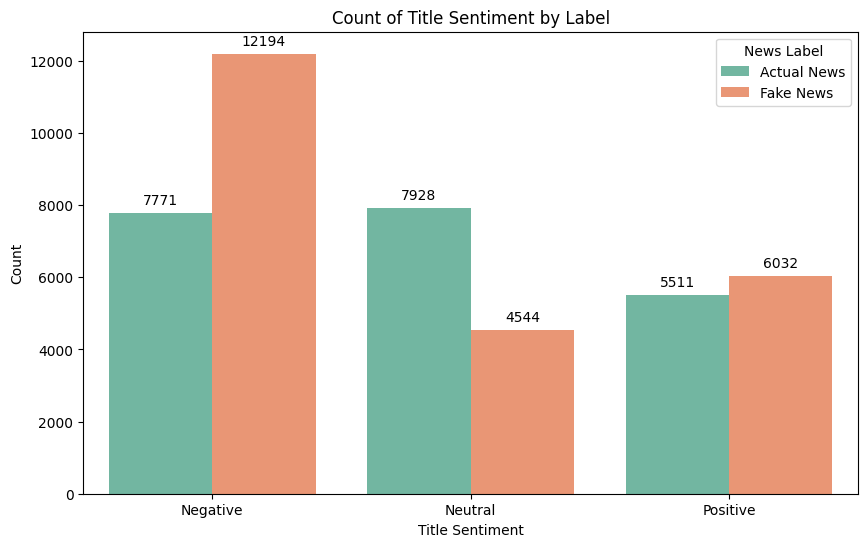

In [120]:
# @title title_sentiment plot

grouped_df = shuffled_df.groupby(['title_sentiment', 'label']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=grouped_df, x='title_sentiment', y='count', hue='label',palette='Set2')

plt.title('Count of Title Sentiment by Label')
plt.xlabel('Title Sentiment')
plt.ylabel('Count')

handles, _ = plt.gca().get_legend_handles_labels()

plt.legend(handles=handles, labels=['Actual News', 'Fake News'], title='News Label')

for p in barplot.patches:
    if p.get_height() > 0:
        barplot.annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

plt.show()

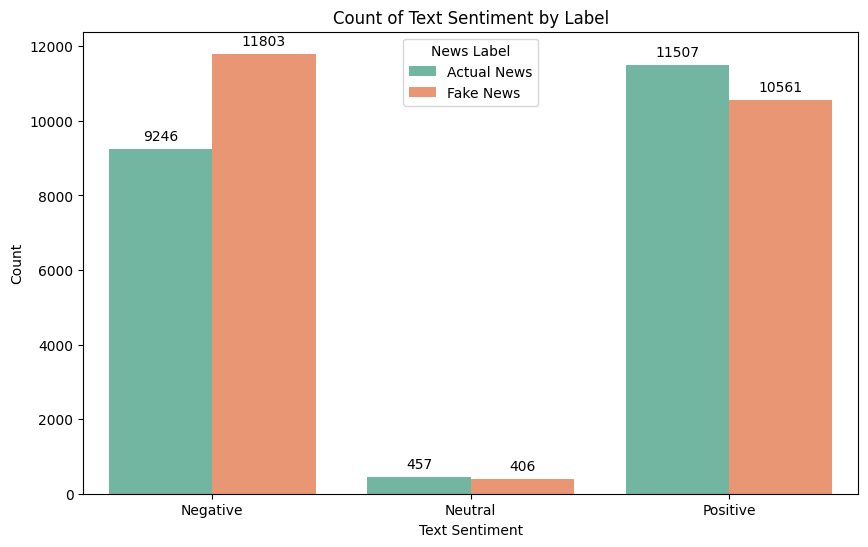

In [121]:
# @title text_sentiment plot

grouped_df = shuffled_df.groupby(['text_sentiment', 'label']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=grouped_df, x='text_sentiment', y='count', hue='label',palette='Set2')

plt.title('Count of Text Sentiment by Label')
plt.xlabel('Text Sentiment')
plt.ylabel('Count')

handles, _ = plt.gca().get_legend_handles_labels()

plt.legend(handles=handles, labels=['Actual News', 'Fake News'], title='News Label')

for p in barplot.patches:
    if p.get_height() > 0:  # Only annotate bars with height > 0
        barplot.annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),
                         textcoords = 'offset points')

plt.show()


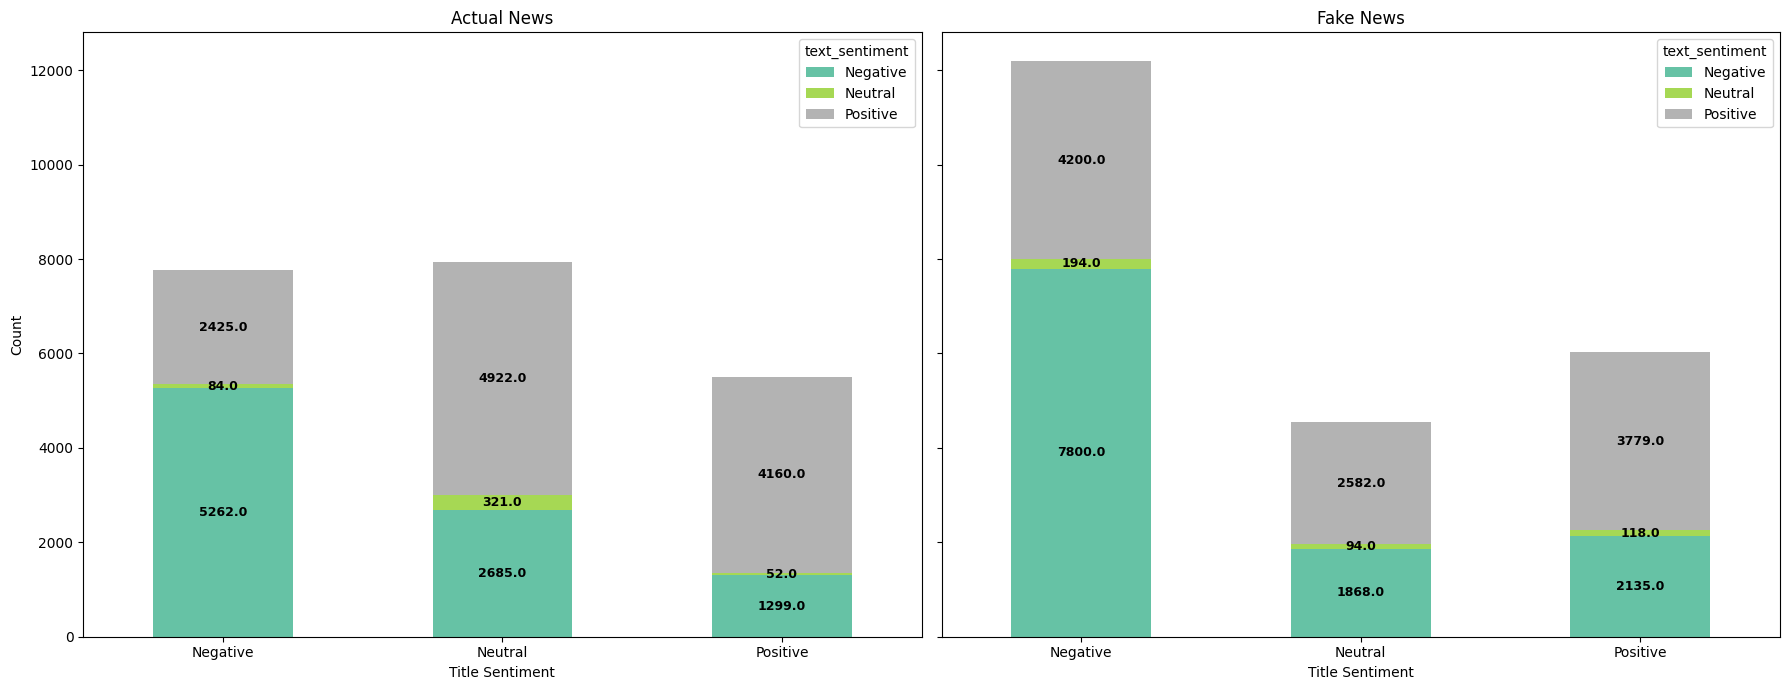

In [119]:
# @title Title Sentiments breakdown based on Text Sentiment

plot_df = shuffled_df.groupby(['label', 'title_sentiment','text_sentiment']).size().reset_index(name='count')

df_label_0 = plot_df[plot_df['label'] == 0]
df_label_1 = plot_df[plot_df['label'] == 1]

# Pivot the data for plotting
pivot_df_label_0 = df_label_0.pivot_table(index='title_sentiment', columns='text_sentiment', values='count', fill_value=0)
pivot_df_label_1 = df_label_1.pivot_table(index='title_sentiment', columns='text_sentiment', values='count', fill_value=0)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7), sharey=True)

# Plot for label 0
ax = pivot_df_label_0.plot(kind='bar', stacked=True, ax=axes[0], cmap='Set2')
for container in ax.containers:
    for patch in container:
        height = patch.get_height()
        width = patch.get_width()
        x = patch.get_x() + width / 2
        y = patch.get_y() + height / 2
        ax.text(x, y, f'{height}', ha='center', va='center', fontsize=9, color='black', weight='bold')
ax.set_title('Actual News')
ax.set_xlabel('Title Sentiment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Count')

# Plot for label 1
ax = pivot_df_label_1.plot(kind='bar', stacked=True, ax=axes[1], cmap='Set2')
for container in ax.containers:
    for patch in container:
        height = patch.get_height()
        width = patch.get_width()
        x = patch.get_x() + width / 2
        y = patch.get_y() + height / 2
        ax.text(x, y, f'{height}', ha='center', va='center', fontsize=9, color='black', weight='bold')
ax.set_title('Fake News')
ax.set_xlabel('Title Sentiment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

title_sentiment       Negative  Neutral  Positive
label text_sentiment                             
0     Negative            5262     2685      1299
      Neutral               84      321        52
      Positive            2425     4922      4160
1     Negative            7800     1868      2135
      Neutral              194       94       118
      Positive            4200     2582      3779

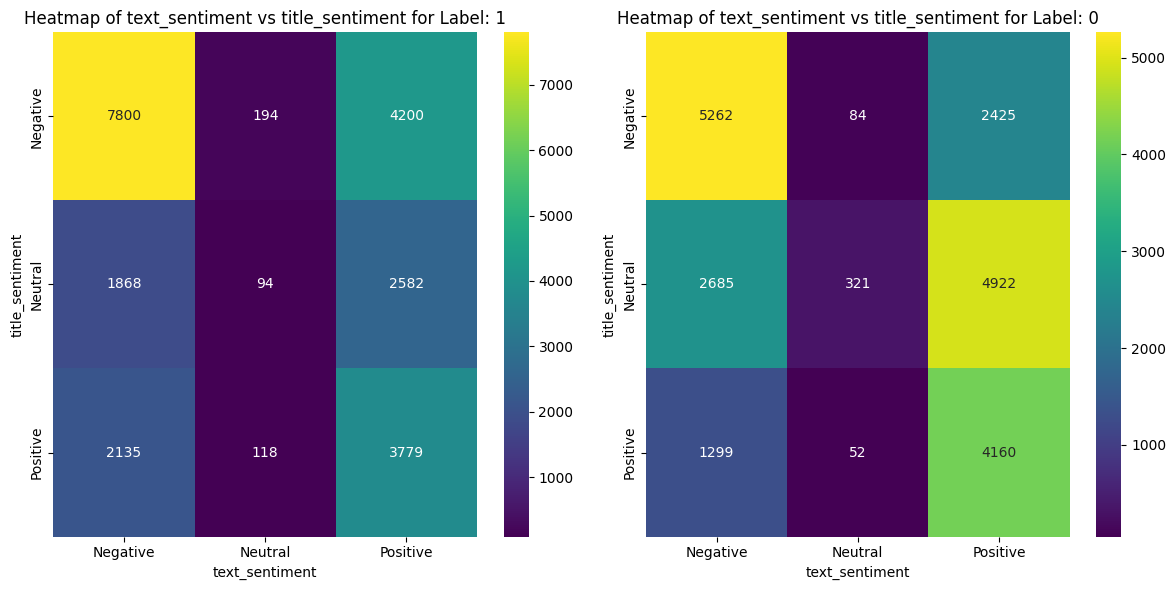

In [86]:
# @title text_sentiment vs title_sentiment

sentiment = shuffled_df.groupby(['label', 'text_sentiment','title_sentiment']).size()
display(sentiment.unstack())

unique_labels = shuffled_df['label'].unique()

fig, axes = plt.subplots(ncols=len(unique_labels), figsize=(6 * len(unique_labels),6))

for i, label in enumerate(unique_labels):
    ax = axes[i] if len(unique_labels) > 1 else axes
    # Filter the DataFrame by label
    df_label = shuffled_df[shuffled_df['label'] == label]

    # Create a crosstab for each label
    df_2dhist = pd.crosstab(df_label['title_sentiment'], df_label['text_sentiment'])

    # Plot heatmap for this label
    sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d', ax=ax)
    ax.set_title(f'Heatmap of text_sentiment vs title_sentiment for Label: {label}')
    ax.set_xlabel('text_sentiment')
    ax.set_ylabel('title_sentiment')

plt.tight_layout()
plt.show()

# Sentence Embeddings

In [128]:
# @title Sentence Embedding - HuggingFace

!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [129]:
# @title Processed Title Sentence Embeddings

sentence_title = [text for text in shuffled_df['processed_title']]
embedded_title_df = pd.DataFrame(model.encode(sentence_title),index=shuffled_df.index)
embedded_title_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.022317,-0.055482,-0.008724,0.004852,0.093044,0.009360,0.008144,-0.016748,0.029065,-0.052659,...,0.051757,0.008868,-0.030298,-0.102760,-0.084688,0.039675,0.047644,0.032053,0.045745,-0.025658
1,-0.045179,0.115735,-0.005683,0.074949,-0.012099,-0.053328,0.021828,-0.031196,0.086562,-0.044208,...,0.102385,-0.031374,0.059577,0.044431,-0.001784,-0.071810,-0.043915,-0.053448,0.018021,-0.000630
2,-0.012790,0.058536,-0.062953,0.022132,-0.008620,0.051185,-0.003585,0.003664,-0.016018,0.060500,...,-0.002819,-0.074031,-0.043419,0.065000,0.015706,0.096031,-0.038543,-0.081110,0.005859,0.027196
3,-0.025950,0.069930,-0.088291,-0.027383,0.068477,-0.031639,0.043876,0.024241,0.065000,-0.081662,...,0.048630,-0.079352,0.073737,0.039045,-0.085042,0.011471,0.027429,-0.006342,-0.046465,-0.021142
4,0.059879,0.045724,0.014842,0.021479,0.088165,0.031555,-0.011106,0.025409,0.015612,0.005909,...,0.096711,0.019373,0.033575,-0.069843,-0.080280,0.011102,-0.019796,0.041763,-0.013382,0.001811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44043,-0.043891,0.071931,0.043253,0.063566,0.055951,-0.013751,-0.012770,-0.032848,-0.049650,-0.032422,...,0.053704,0.033846,0.039491,-0.058451,-0.065764,-0.014294,-0.018780,-0.006287,0.040776,-0.052770
44044,0.019541,0.077409,-0.042454,-0.082540,-0.004023,0.090824,0.000184,-0.077688,0.077963,0.003290,...,0.104991,-0.036078,0.073243,0.003100,0.002666,0.047370,0.091161,-0.015334,0.052768,-0.030206
44045,0.023139,0.007926,-0.056685,0.028122,-0.010577,-0.019921,-0.007042,0.023236,-0.039895,-0.021304,...,0.083918,0.035031,0.029079,0.030085,0.017437,-0.028214,-0.011484,-0.040568,-0.056591,-0.082005
44046,-0.051961,-0.008828,0.043261,-0.104071,-0.020485,0.020095,0.022567,-0.062184,-0.001160,0.071163,...,0.103954,0.059722,-0.006390,-0.047090,-0.024575,0.046763,0.026622,-0.013811,0.100672,-0.037987


In [130]:
# @title Processed Text Sentence Embeddings

sentence_text = [text for text in shuffled_df['processed_text']]
embedding_text = model.encode(sentence_text)
embedding_text.shape

(43980, 384)

In [131]:
embedding_text_array = np.array(embedding_text)
print(embedding_text_array.shape)
embedding_text_array

(43980, 384)


array([[ 0.05441159, -0.03423444, -0.00391526, ...,  0.06097293,
        -0.07136899,  0.006516  ],
       [ 0.00923845, -0.0358683 ,  0.00772214, ..., -0.10347973,
         0.03683053,  0.00532883],
       [-0.03403173, -0.02241368, -0.01421609, ..., -0.10589941,
        -0.03868539,  0.02525104],
       ...,
       [ 0.00362448, -0.09603579,  0.02906154, ..., -0.08817486,
        -0.057381  , -0.04917317],
       [-0.02377481, -0.07231796,  0.05212564, ..., -0.065004  ,
         0.03182532,  0.04533706],
       [-0.04449268, -0.01241852, -0.05189064, ..., -0.03023002,
         0.00981497, -0.01043145]], dtype=float32)

In [132]:
embedded_text_df = pd.DataFrame(embedding_text,index= shuffled_df.index)
embedded_text_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.054412,-0.034234,-0.003915,-0.018006,0.103821,0.028307,-0.028923,-0.029589,0.049429,-0.070448,...,0.024840,0.084159,-0.012842,-0.062996,-0.088729,0.029233,0.043933,0.060973,-0.071369,0.006516
1,0.009238,-0.035868,0.007722,0.028253,-0.008665,0.026607,-0.030550,-0.044647,-0.006842,-0.059295,...,0.001417,-0.008961,0.052684,0.053406,-0.000982,-0.068585,0.076689,-0.103480,0.036831,0.005329
2,-0.034032,-0.022414,-0.014216,0.038198,-0.006373,0.082387,0.015810,-0.011218,-0.046398,0.104927,...,-0.031948,-0.066451,-0.052253,0.097984,-0.000522,0.038051,-0.031131,-0.105899,-0.038685,0.025251
3,-0.027549,0.020181,-0.038603,0.046147,0.076445,0.038076,0.045771,-0.035344,0.006674,-0.014979,...,0.032715,-0.045666,0.008491,0.055224,-0.047728,0.028852,0.108943,-0.009914,-0.078602,-0.021400
4,0.037234,0.008600,0.020004,0.057749,0.094498,-0.030259,0.051723,-0.057413,-0.030166,-0.043483,...,0.058937,0.094695,0.034359,-0.004156,-0.085111,0.007321,-0.004087,0.038285,-0.012946,0.024507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44043,-0.023329,0.020189,-0.001744,0.029379,0.005691,0.042007,0.035491,-0.011841,0.028926,-0.045419,...,0.106108,0.045735,-0.025699,0.015727,-0.077192,-0.005824,-0.030553,-0.050440,0.045558,0.045797
44044,0.029759,0.039188,-0.077570,0.001399,0.078482,0.047788,-0.011942,-0.046498,-0.007880,-0.016800,...,0.024742,-0.018244,-0.007741,-0.010880,0.013203,0.047778,0.152208,-0.050063,0.011415,-0.017771
44045,0.003624,-0.096036,0.029062,0.021968,-0.020055,0.007838,-0.032168,-0.056454,-0.106425,-0.005794,...,0.057047,0.057318,0.003801,0.054003,0.045542,-0.024378,0.040961,-0.088175,-0.057381,-0.049173
44046,-0.023775,-0.072318,0.052126,-0.066564,0.019676,0.042625,0.016419,-0.029985,-0.070107,0.001863,...,0.026284,-0.011422,-0.013675,-0.021643,-0.083243,-0.028720,0.014001,-0.065004,0.031825,0.045337


# Classifaction Based on the Text

In [ ]:
# Train test split for text embeddings

from sklearn.model_selection import train_test_split

X_text = embedded_text_df
y_text = shuffled_df[['label']]

X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y_text, test_size=0.20, random_state=42,stratify=y_text)

print('X_train_text shape:', X_train_text.shape)
print('X_test_text shape:', X_test_text.shape)
print('y_train_text shape:',y_train_text.shape)
print('y_test_text shape:',y_test_text.shape)


X_train_text shape: (35184, 384)
X_test_text shape: (8796, 384)
y_train_text shape: (35184, 1)
y_test_text shape: (8796, 1)


In [ ]:
y_train_text_1d = y_train_text.values.ravel()
y_test_text_1d = y_test_text.values.ravel()

def plot_conf_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

Cross-Validation Balanced Accuracy: 96.47%
Test Balanced Accuracy: 96.87%


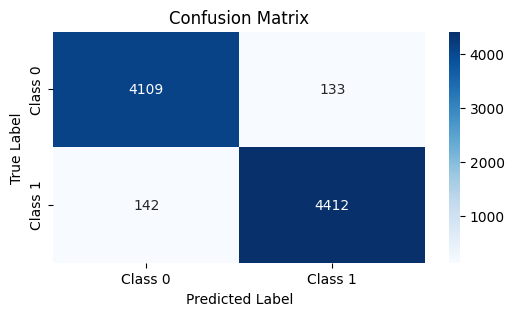

In [ ]:
# @title SVM

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

# SVM model
svm = SVC()

# Cross Validation
svm_text_training_accuracy = cross_val_score(svm, X_train_text, y_train_text_1d, cv=3, scoring='balanced_accuracy')

# Fit the model on the entire training data
svm.fit(X_train_text, y_train_text_1d)
test_predictions = svm.predict(X_test_text)

# Model Accuracies
print("Cross-Validation Balanced Accuracy: {:.2f}%".format(svm_text_training_accuracy.mean() * 100))
svm_text_test_accuracy = balanced_accuracy_score(y_test_text_1d, test_predictions)

print("Test Balanced Accuracy: {:.2f}%".format(svm_text_test_accuracy * 100))
plot_conf_matrix(y_test_text_1d, test_predictions)


Cross-Validation Balanced Accuracy: 82.44%
Test Balanced Accuracy: 84.33%


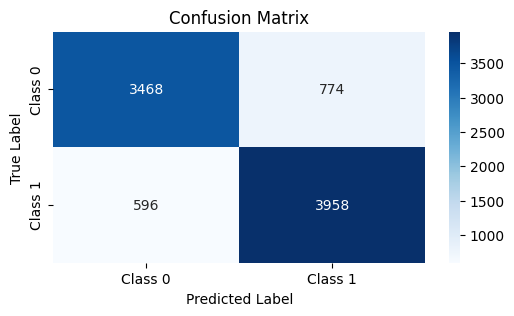

In [ ]:
# @title Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier()

# Cross Validation
dt_text_training_accuracy = cross_val_score(dt, X_train_text, y_train_text_1d, cv=3, scoring='balanced_accuracy')

# Fit the model on the entire training data
dt.fit(X_train_text, y_train_text_1d)
test_predictions = dt.predict(X_test_text)

# Model Accuracies
print("Cross-Validation Balanced Accuracy: {:.2f}%".format(dt_text_training_accuracy.mean() * 100))
dt_text_test_accuracy = balanced_accuracy_score(y_test_text_1d, test_predictions)

print("Test Balanced Accuracy: {:.2f}%".format(dt_text_test_accuracy * 100))
plot_conf_matrix(y_test_text_1d, test_predictions)

Cross-Validation Balanced Accuracy: 92.32%
Test Balanced Accuracy: 93.03%


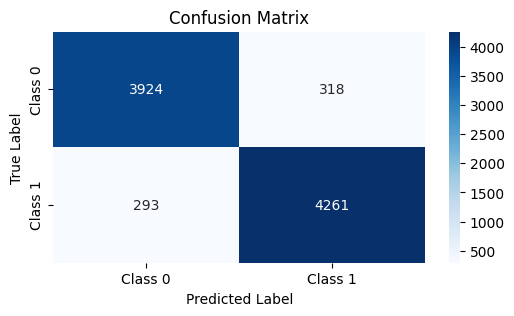

In [ ]:
# @title Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Cross Validation
rf_text_training_accuracy = cross_val_score(rf, X_train_text, y_train_text_1d, cv=3, scoring='balanced_accuracy')

# Fit the model on the entire training data
rf.fit(X_train_text, y_train_text_1d)
test_predictions = rf.predict(X_test_text)

# Model Accuracies
print("Cross-Validation Balanced Accuracy: {:.2f}%".format(rf_text_training_accuracy.mean() * 100))
rf_text_test_accuracy = balanced_accuracy_score(y_test_text_1d, test_predictions)

print("Test Balanced Accuracy: {:.2f}%".format(rf_text_test_accuracy * 100))
plot_conf_matrix(y_test_text_1d, test_predictions)

Cross-Validation Balanced Accuracy: 94.72%
Test Balanced Accuracy: 95.51%


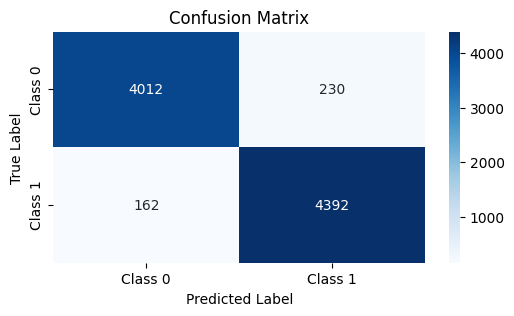

In [ ]:
# @title XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier()

# Cross Validation
xgb_text_training_accuracy = cross_val_score(xgb, X_train_text, y_train_text_1d, cv=3, scoring='balanced_accuracy')

# Fit the model on the entire training data
xgb.fit(X_train_text, y_train_text_1d)
test_predictions = xgb.predict(X_test_text)

# Model Accuracies
print("Cross-Validation Balanced Accuracy: {:.2f}%".format(xgb_text_training_accuracy.mean() * 100))
xgb_text_test_accuracy = balanced_accuracy_score(y_test_text_1d, test_predictions)

print("Test Balanced Accuracy: {:.2f}%".format(xgb_text_test_accuracy * 100))
plot_conf_matrix(y_test_text_1d, test_predictions)

# Classifaction Based on the Title

In [ ]:
# Train test split for title embeddings

X_title = embedded_title_df
y_title = shuffled_df[['label']]


X_train_title, X_test_title, y_train_title, y_test_title = train_test_split(X_title, y_title, test_size=0.20, random_state=42,stratify=y_title)

print('X_train_title shape:', X_train_title.shape)
print('X_test_title shape:', X_test_title.shape)
print('y_train_title shape:',y_train_title.shape)
print('y_test_title shape:',y_test_title.shape)

X_train_title shape: (35184, 384)
X_test_title shape: (8796, 384)
y_train_title shape: (35184, 1)
y_test_title shape: (8796, 1)


In [ ]:
y_train_title_1d = y_train_title.values.ravel()
y_test_title_1d = y_test_title.values.ravel()

Cross-Validation Balanced Accuracy: 93.67%
Test Balanced Accuracy: 94.53%


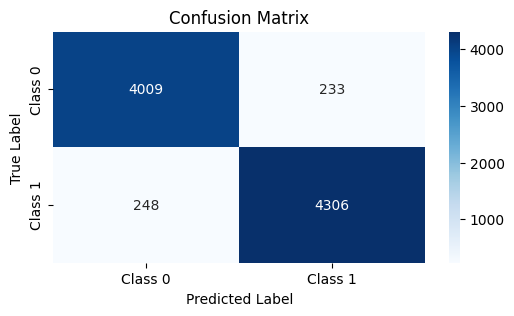

In [ ]:
# @title SVM

svm = SVC()

# Cross Validation
svm_title_training_accuracy = cross_val_score(svm, X_train_title, y_train_title_1d, cv=3, scoring='balanced_accuracy')

# Fit the model on the entire training data
svm.fit(X_train_title, y_train_title_1d)
test_predictions = svm.predict(X_test_title)

# Model Accuracies
print("Cross-Validation Balanced Accuracy: {:.2f}%".format(svm_title_training_accuracy.mean() * 100))
svm_title_test_accuracy = balanced_accuracy_score(y_test_title_1d, test_predictions)

print("Test Balanced Accuracy: {:.2f}%".format(svm_title_test_accuracy * 100))
plot_conf_matrix(y_test_title_1d, test_predictions)

Cross-Validation Balanced Accuracy: 78.76%
Test Balanced Accuracy: 80.80%


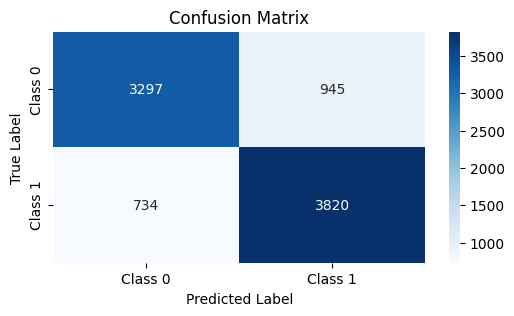

In [ ]:
# @title Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier()

# Cross Validation
dt_title_training_accuracy = cross_val_score(dt, X_train_title, y_train_title_1d, cv=3, scoring='balanced_accuracy')

# Fit the model on the entire training data
dt.fit(X_train_title, y_train_title_1d)
test_predictions = dt.predict(X_test_title)

# Model Accuracies
print("Cross-Validation Balanced Accuracy: {:.2f}%".format(dt_title_training_accuracy.mean() * 100))
dt_title_test_accuracy = balanced_accuracy_score(y_test_title_1d, test_predictions)

print("Test Balanced Accuracy: {:.2f}%".format(dt_title_test_accuracy * 100))
plot_conf_matrix(y_test_title_1d, test_predictions)

Cross-Validation Balanced Accuracy: 89.39%
Test Balanced Accuracy: 90.49%


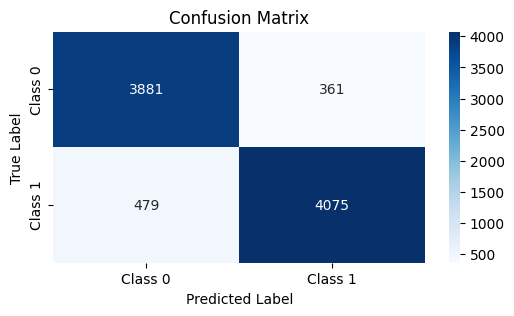

In [ ]:
# @title Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Cross Validation
rf_title_training_accuracy = cross_val_score(rf, X_train_title, y_train_title_1d, cv=3, scoring='balanced_accuracy')

# Fit the model on the entire training data
rf.fit(X_train_title, y_train_title_1d)
test_predictions = rf.predict(X_test_title)

# Model Accuracies
print("Cross-Validation Balanced Accuracy: {:.2f}%".format(rf_title_training_accuracy.mean() * 100))
rf_title_test_accuracy = balanced_accuracy_score(y_test_title_1d, test_predictions)

print("Test Balanced Accuracy: {:.2f}%".format(rf_title_test_accuracy * 100))
plot_conf_matrix(y_test_title_1d, test_predictions)

Cross-Validation Balanced Accuracy: 91.99%
Test Balanced Accuracy: 93.15%


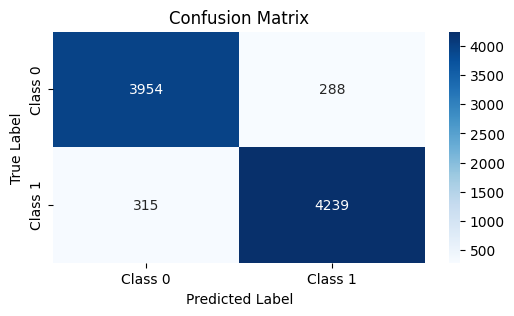

In [ ]:
# @title XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier()

# Cross Validation
xgb_title_training_accuracy = cross_val_score(xgb, X_train_title, y_train_title_1d, cv=3, scoring='balanced_accuracy')

# Fit the model on the entire training data
xgb.fit(X_train_title, y_train_title_1d)
test_predictions = xgb.predict(X_test_title)

# Model Accuracies
print("Cross-Validation Balanced Accuracy: {:.2f}%".format(xgb_title_training_accuracy.mean() * 100))
xgb_title_test_accuracy = balanced_accuracy_score(y_test_title_1d, test_predictions)

print("Test Balanced Accuracy: {:.2f}%".format(xgb_title_test_accuracy * 100))
plot_conf_matrix(y_test_title_1d, test_predictions)

In [ ]:
# @title Summary Table

models =['SVM','Decision Tree','Random Forest','XGBoost']
text_accuracy_scores = [svm_text_test_accuracy*100,dt_text_test_accuracy*100,rf_text_test_accuracy*100,xgb_text_test_accuracy*100]
text_training_accuracy_scores = [svm_text_training_accuracy.mean()*100,dt_text_training_accuracy.mean()*100,rf_text_training_accuracy.mean()*100,xgb_text_training_accuracy.mean()*100]
title_accuracy_scores = [svm_title_test_accuracy*100,dt_title_test_accuracy*100,rf_title_test_accuracy*100,xgb_title_test_accuracy*100]
title_training_accuracy_scores = [svm_title_training_accuracy.mean()*100,dt_title_training_accuracy.mean()*100,rf_title_training_accuracy.mean()*100,xgb_title_training_accuracy.mean()*100]

summary_table = pd.DataFrame({
    'Model': models,
    'Text Test Accuracy': text_accuracy_scores,
    'Text Training Accuracy': text_training_accuracy_scores,
    'Title Test Accuracy': title_accuracy_scores,
    'Title Training Accuracy': title_training_accuracy_scores
})

summary_table

,Model,Text Test Accuracy,Text Training Accuracy,Title Test Accuracy,Title Training Accuracy
0,SVM,96.873274,96.471514,94.530773,93.669250
1,Decision Tree,84.333247,82.437075,80.802537,78.755236
2,Random Forest,93.034816,92.319741,90.485819,89.385410
3,XGBoost,95.510358,94.716894,93.146877,91.988302


# Classification based on Cosine Similarity between the Title and Text

In [133]:
from sklearn.metrics.pairwise import cosine_similarity

# Convert DataFrames to NumPy arrays
title_embeddings = embedded_title_df.values
text_embeddings = embedded_text_df.values

cosine_sim = []

for i in range(len(title_embeddings)):
    similarity = cosine_similarity([title_embeddings[i]], [text_embeddings[i]])[0][0]
    cosine_sim.append(similarity)

shuffled_df['cosine_similarity'] = cosine_sim
shuffled_df

<ipython-input-133-6c140043a4cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df['cosine_similarity'] = cosine_sim


,title,text,subject,date,label,processed_title,processed_text,title_sentiment,text_sentiment,cosine_similarity
0,What A Joke! Hillary Clinton Goes Missing Duri...,Hillary Clinton has a habit of going missing d...,politics,2015-12-20,1,joke hillary clinton goes missing dem debate s...,hillary clinton habit going missing debates la...,Negative,Positive,0.581014
1,Trump Campaign Accidentally CONFIRMS That Tru...,"True to form, Trump and his campaign are royal...",News,2016-10-01,1,trump campaign accidentally confirms trump ill...,true form trump campaign royally pissed newswe...,Negative,Negative,0.494577
2,"Ivory Coast to retire 1,000 soldiers to slim d...",ABIDJAN (Reuters) - Ivory Coast will cut its a...,worldnews,2017-12-06,0,ivory coast retire 1000 soldiers slim military,ivory coast cut armed forces 1000 troops end y...,Neutral,Negative,0.725857
3,White Las Vegas Teen Caught On Camera Calling...,A Las Vegas high school student was caught on ...,News,2017-05-10,1,white las vegas teen caught camera calling bla...,las vegas high school student caught camera ca...,Neutral,Positive,0.676141
4,Ben Carson Just Totally Lost His Sh*t On MSNB...,When Ben Carson was asked about the multiple w...,News,2016-10-14,1,ben carson totally lost sht msnbc asked trump ...,ben carson asked multiple women accusing donal...,Negative,Negative,0.720018
...,...,...,...,...,...,...,...,...,...,...
44043,Powerful Mexico former union boss granted hous...,MEXICO CITY (Reuters) - The powerful former le...,worldnews,2017-12-15,0,powerful mexico former union boss granted hous...,powerful former leader mexico largest teacher ...,Positive,Negative,0.629719
44044,MASS NYE SEXUAL ASSAULTS IN EUROPE EXPLAINED: ...,This is possibly the most disturbing video we ...,Government News,2016-01-12,1,mass nye sexual assaults europe explained vide...,possibly disturbing video ever posted website ...,Negative,Negative,0.630226
44045,Senate set to begin debate on Puerto Rico debt...,WASHINGTON/NEW YORK (Reuters) - After months o...,politicsNews,2016-06-27,0,senate set begin debate puerto rico debt relie...,months waiting us congress act puerto ricos ec...,Positive,Negative,0.615146
44046,U.S. net neutrality advocates blast Pai effort...,WASHINGTON (Reuters) - Advocates of landmark n...,politicsNews,2017-04-07,0,us net neutrality advocates blast pai effort r...,advocates landmark net neutrality rules friday...,Neutral,Positive,0.537519


In [134]:
np.mean(shuffled_df['cosine_similarity'])

0.5713651

In [135]:
print('Fake news Cosine similarity mean:',shuffled_df[shuffled_df.label == 1].cosine_similarity.mean())

shuffled_df[shuffled_df.label == 1].cosine_similarity.describe()

Fake news Cosine similarity mean: 0.5232212


,cosine_similarity
count,22770.000000
mean,0.523221
std,0.114149
min,-0.068336
25%,0.458691
50%,0.534295
75%,0.599827
max,0.945254


In [136]:
print('Actual news Cosine similarity mean:',shuffled_df[shuffled_df.label == 0].cosine_similarity.mean())

shuffled_df[shuffled_df.label == 0].cosine_similarity.describe()

Actual news Cosine similarity mean: 0.6230501


,cosine_similarity
count,21210.000000
mean,0.623050
std,0.111671
min,0.069015
25%,0.553482
50%,0.629341
75%,0.701463
max,0.918921


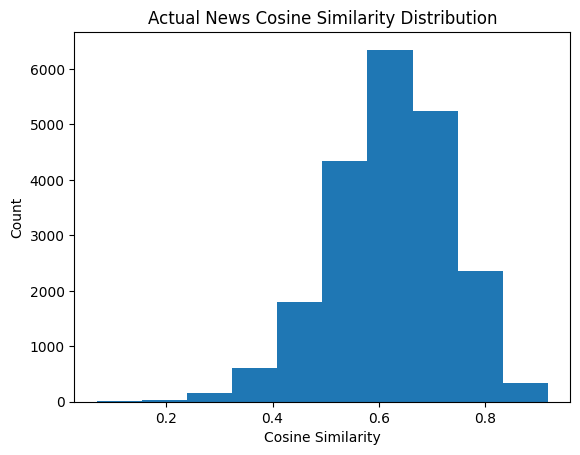

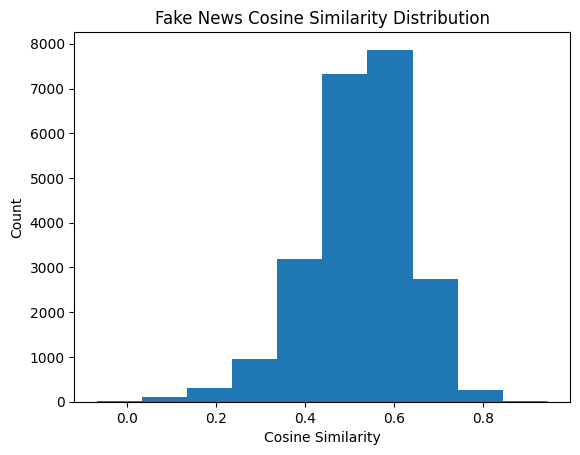

In [139]:
plt.hist(shuffled_df[shuffled_df.label == 0].cosine_similarity)
plt.title('Actual News Cosine Similarity Distribution')
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.show()

plt.hist(shuffled_df[shuffled_df.label == 1].cosine_similarity)
plt.title('Fake News Cosine Similarity Distribution')
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.show()